# Carregamento da base de dados

In [2]:
import pandas as pd

In [3]:
# Exibir dados
import plotly.express as px
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv(r'base_dados.csv', encoding='utf-8')
df.head()

,Data,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
0,2010-01-01 15:57:36,Computador Lenovo,Computador,2,Venda,10208.56,7496.99,Online,A Vista,MT,Nova Mutum
1,2010-01-04 09:35:31,Computador Lenovo,Computador,3,Compra,9044.01,4491.92,Loja Física,Cartão de Crédito,GO,Rio Quente
2,2010-01-04 09:43:37,Notebook Dell,Notebook,1,Venda,2427.47,1487.71,Loja Física,Transferência Bancária,MS,Juti
3,2010-01-04 10:13:10,Impressora Epson,Impressora,1,Venda,839.06,521.64,Loja Física,Boleto,DF,Brasília
4,2010-01-04 12:03:09,Impressora Epson,Impressora,4,Venda,776.69,342.24,Distribuidor,Boleto,PB,Várzea


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 10000 non-null  object 
 1   Produto              10000 non-null  object 
 2   Categoria            10000 non-null  object 
 3   Quantidade           10000 non-null  int64  
 4   Tipo                 10000 non-null  object 
 5   Valor Unitário       10000 non-null  float64
 6   Custo                10000 non-null  float64
 7   Canal de Venda       10000 non-null  object 
 8   Método de Pagamento  10000 non-null  object 
 9   Estado               10000 non-null  object 
 10  Município            10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [7]:
df.shape

(10000, 11)

In [8]:
# Verifica o ID e os maiores valores encontrados em cada coluna
#pd.concat([df.idxmax(), df.max()], axis=1)

# Tratamento do atributo `Data`

In [9]:
# Converte o atributo 'Data' para o tipo 'pandas.datetime'
df['Data'] = pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 10000 non-null  datetime64[ns]
 1   Produto              10000 non-null  object        
 2   Categoria            10000 non-null  object        
 3   Quantidade           10000 non-null  int64         
 4   Tipo                 10000 non-null  object        
 5   Valor Unitário       10000 non-null  float64       
 6   Custo                10000 non-null  float64       
 7   Canal de Venda       10000 non-null  object        
 8   Método de Pagamento  10000 non-null  object        
 9   Estado               10000 non-null  object        
 10  Município            10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.5+ KB


# Criação dos atributos `Mês` e `Ano`

In [10]:
# Criar colunas especificas para o Mês e o Ano do registro
df.insert(1, 'Mes', df['Data'].dt.month)
df.insert(2, 'Ano', df['Data'].dt.year)
df.head()

,Data,Mes,Ano,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
0,2010-01-01 15:57:36,1,2010,Computador Lenovo,Computador,2,Venda,10208.56,7496.99,Online,A Vista,MT,Nova Mutum
1,2010-01-04 09:35:31,1,2010,Computador Lenovo,Computador,3,Compra,9044.01,4491.92,Loja Física,Cartão de Crédito,GO,Rio Quente
2,2010-01-04 09:43:37,1,2010,Notebook Dell,Notebook,1,Venda,2427.47,1487.71,Loja Física,Transferência Bancária,MS,Juti
3,2010-01-04 10:13:10,1,2010,Impressora Epson,Impressora,1,Venda,839.06,521.64,Loja Física,Boleto,DF,Brasília
4,2010-01-04 12:03:09,1,2010,Impressora Epson,Impressora,4,Venda,776.69,342.24,Distribuidor,Boleto,PB,Várzea


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 10000 non-null  datetime64[ns]
 1   Mes                  10000 non-null  int32         
 2   Ano                  10000 non-null  int32         
 3   Produto              10000 non-null  object        
 4   Categoria            10000 non-null  object        
 5   Quantidade           10000 non-null  int64         
 6   Tipo                 10000 non-null  object        
 7   Valor Unitário       10000 non-null  float64       
 8   Custo                10000 non-null  float64       
 9   Canal de Venda       10000 non-null  object        
 10  Método de Pagamento  10000 non-null  object        
 11  Estado               10000 non-null  object        
 12  Município            10000 non-null  object        
dtypes: datetime64[ns](1), float64(2)

# Análise de Dados

## Analítica

### Vendas ao Longo do Tempo
Permite acompanhar a evolução das vendas ao longo do tempo, identificando tendências e padrões.

* **Relação**: Data e Hora x Valor Unitário
* **Gráfico**: Linhas ou Área

In [12]:
compra_venda_tempo = df.groupby(['Ano', 'Tipo'], as_index=False)['Valor Unitário'].mean().round(2)
display(compra_venda_tempo)

,Ano,Tipo,Valor Unitário
0,2010,Compra,1800.12
1,2010,Venda,1968.86
2,2011,Compra,1998.97
3,2011,Venda,2056.23
4,2012,Compra,2047.96
5,2012,Venda,1929.89
6,2013,Compra,1823.59
7,2013,Venda,1819.91
8,2014,Compra,2135.10
9,2014,Venda,2081.98


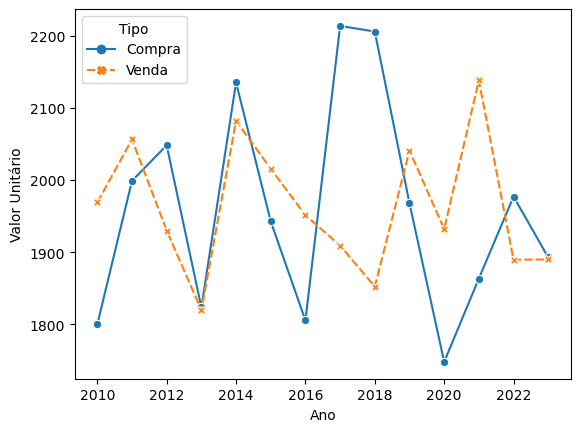

In [13]:
sns.lineplot(data=compra_venda_tempo, x='Ano', y='Valor Unitário', hue='Tipo', style='Tipo', markers=True);

In [14]:
fig = px.line(compra_venda_tempo, x="Ano", y="Valor Unitário", color='Tipo', title='Variação Média de Preços ao longo dos Anos', markers=True)
fig.update_traces(textposition="top right")
fig.show()

In [15]:
# Utilizando o Bokeh
plot = figure(width=900, height=600, title='Variação Média de Preços ao lonog dos Anos', toolbar_location=None)
line1 = compra_venda_tempo[compra_venda_tempo['Tipo'] == 'Compra']
line2 = compra_venda_tempo[compra_venda_tempo['Tipo'] == 'Venda']
plot.line(x=line1['Ano'], y=line1['Valor Unitário'], line_width=2, legend_label='Compra', color='green')
plot.line(x=line2['Ano'], y=line2['Valor Unitário'], line_width=2, legend_label='Venda', color='blue')
show(plot)

### Desempenho dos Produtos
Mostra quais produtos têm maior saida, auxiliando no planejamnto de estoque e promoções.
* **Relação**: Produto x Quantidade Vendida
* **Gráfico**: Barras

In [16]:
desempenho_produto = df[df['Tipo'] == 'Venda'].groupby(['Produto'], as_index=False)['Quantidade'].sum().sort_values(by='Quantidade', ignore_index=True, ascending=False)
desempenho_produto_minimo = desempenho_produto['Quantidade'].min()*0.95
desempenho_produto_maximo = desempenho_produto['Quantidade'].max()*1.01

display(desempenho_produto)

,Produto,Quantidade
0,Teclado Logitech,571
1,Computador Lenovo,565
2,Computador Apple,553
3,Mouse Redragon,544
4,Mouse Multilaser,525
5,Mouse C3Teck,525
6,Impressora Samsung,521
7,HD Externo Adata,503
8,Teclado Microsoft,501
9,Monitor AOC,497


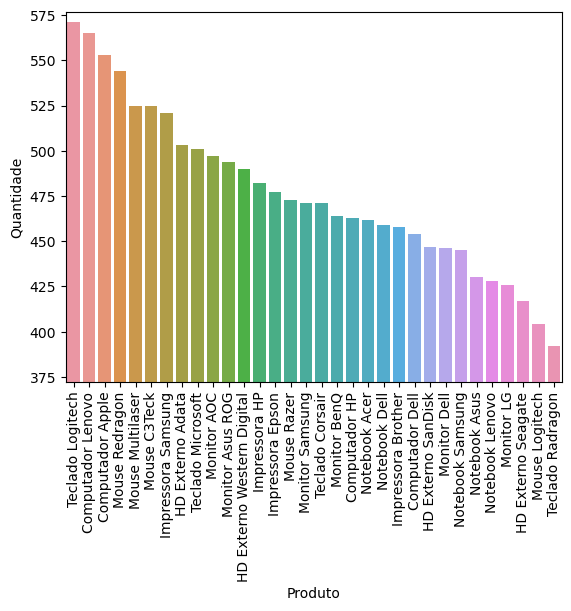

In [17]:
# Seaborn 1
gfg = sns.barplot(desempenho_produto, x="Produto", y="Quantidade")
gfg.set_ylim(desempenho_produto_minimo, desempenho_produto_maximo)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

(372.4, 576.71)

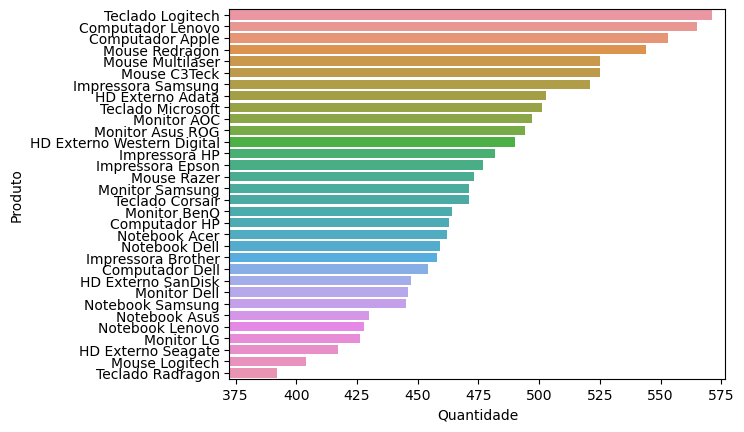

In [18]:
# Seaborn 2
gfg = sns.barplot(desempenho_produto, x="Quantidade", y="Produto")
gfg.set_xlim(desempenho_produto_minimo, desempenho_produto_maximo)

In [19]:
# Plotly Express 1
fig = px.bar(desempenho_produto, x="Produto", y="Quantidade", title='Desempenho dos Produtos')
fig.update_layout(yaxis_range=[desempenho_produto_minimo, desempenho_produto_maximo])
fig.show()

In [20]:
# Plotly Express 2
fig = px.bar(desempenho_produto, x="Quantidade", y="Produto", title='Desempenho dos Produtos')
fig.update_layout(xaxis_range=[desempenho_produto_minimo, desempenho_produto_maximo], height=700)
fig.show()

In [21]:
# Bokeh 1
bar_produtos = desempenho_produto['Produto'].values.tolist()
bar_quantidade = desempenho_produto['Quantidade'].values.tolist()

p = figure(x_range=bar_produtos, title='Desempenho dos Produtos', width=900, height=500)
p.vbar(x=bar_produtos, top=bar_quantidade, width=0.9)
p.xaxis.major_label_orientation = "vertical"
p.xaxis.subgroup_label_orientation = "normal"
p.y_range.start = desempenho_produto_minimo
p.y_range.end = desempenho_produto_maximo
show(p)

In [22]:
# Bokeh 2
bar_produtos = desempenho_produto['Produto'].values.tolist()
bar_quantidade = desempenho_produto['Quantidade'].values.tolist()

p = figure(y_range=bar_produtos, title='Desempenho dos Produtos', width=600, height=600)
p.hbar(y=bar_produtos, right=bar_quantidade, height=0.9)
p.x_range.start = desempenho_produto_minimo
p.x_range.end = desempenho_produto_maximo
show(p)

### Lucratividade por Categoria
Avalia a margem de lucro por categoria, informando sobre a rentabilidade dos seguimentos.
* **Relação**: Categoria do Produto x Lucro (Quantidade do Produto x (Valor Unitário - Valor do Custo))
* **Gráfico**: Barras Empilhadas

In [23]:
categoria_quantidade_produto_total = df.groupby(['Categoria'], as_index=False)['Quantidade'].sum()
categoria_quantidade_produto_total.sort_values(by='Quantidade', ascending=False, inplace=True)
categoria_quantidade_produto_total_max = int(categoria_quantidade_produto_total['Quantidade'].max() * 1.01)
categoria_quantidade_produto_total_min = int(categoria_quantidade_produto_total['Quantidade'].min()*0.95)
display(categoria_quantidade_produto_total)

,Categoria,Quantidade
3,Monitor,5568
4,Mouse,4823
5,Notebook,4579
1,Computador,3900
2,Impressora,3895
0,Armazenamento,3719
6,Teclado,3625


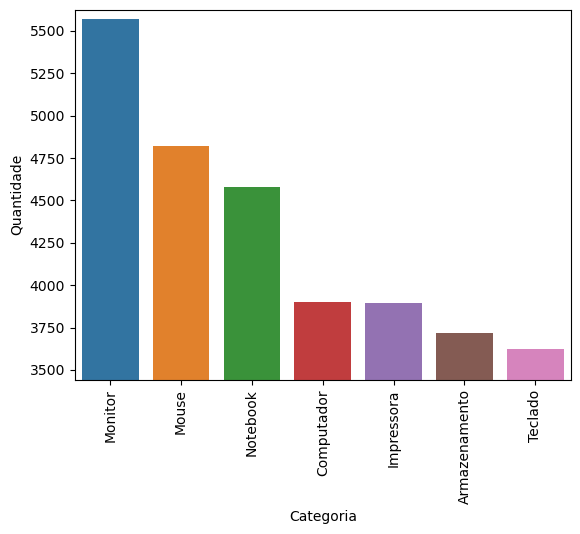

In [26]:
# Seaborn 1
gfg = sns.barplot(x=categoria_quantidade_produto_total['Categoria'], y=categoria_quantidade_produto_total['Quantidade'])
gfg.set_ylim(categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

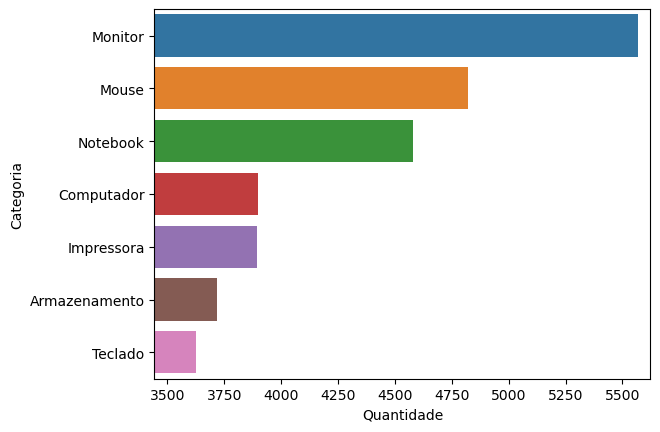

In [43]:
# Seaborn 2
gfg = sns.barplot(x=categoria_quantidade_produto_total['Quantidade'], y=categoria_quantidade_produto_total['Categoria'])
gfg.set_xlim(categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max);

In [33]:
# Plotly Express 1
fig = px.bar(categoria_quantidade_produto_total, x="Categoria", y="Quantidade", title='Vendas por Categoria')
fig.update_layout(yaxis_range=[categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max])
fig.show()

In [34]:
# Plotly Express 2
fig = px.bar(categoria_quantidade_produto_total, x="Quantidade", y="Categoria", title='Vendas por Categoria')
fig.update_layout(xaxis_range=[categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max])
fig.show()

////////////////////////////////////////////

In [37]:
categoria_valor_unitario_total = df.groupby(['Categoria'], as_index=False)['Valor Unitário'].sum()
categoria_valor_unitario_total.sort_values(by='Valor Unitário', ascending=False, inplace=True)
categoria_valor_unitario_total_max = int(categoria_valor_unitario_total['Valor Unitário'].max() * 1.01)
categoria_valor_unitario_total_min = int(categoria_valor_unitario_total['Valor Unitário'].min()*0.95)
display(categoria_valor_unitario_total)

,Categoria,Valor Unitário
1,Computador,9958548.09
5,Notebook,3108356.48
3,Monitor,2686228.61
2,Impressora,1337376.05
4,Mouse,1101711.48
6,Teclado,946831.50
0,Armazenamento,444938.73


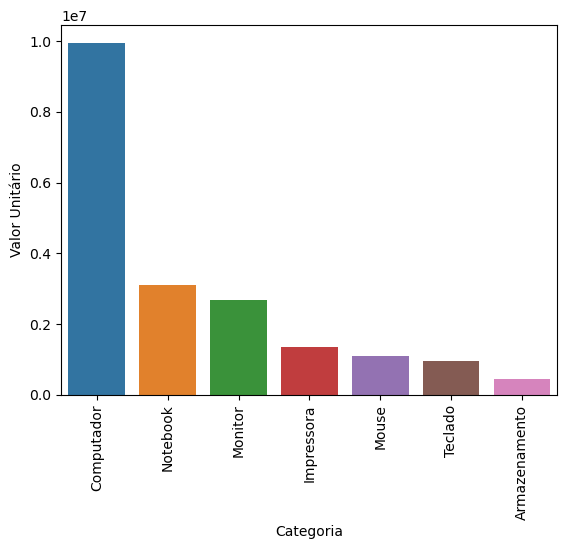

In [40]:
# Seaborn 1
gfg = sns.barplot(x=categoria_valor_unitario_total['Categoria'], y=categoria_valor_unitario_total['Valor Unitário'])
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

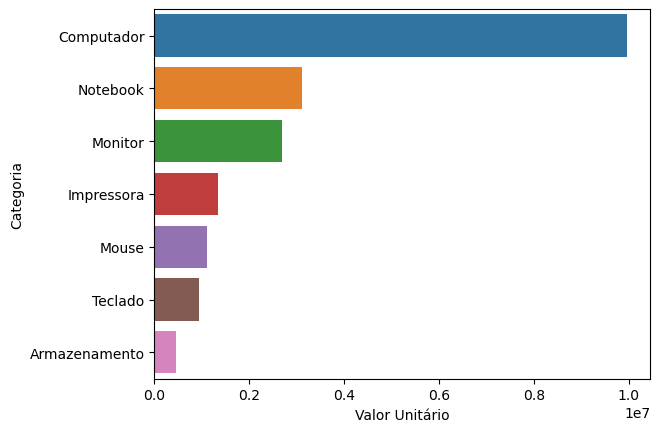

In [44]:
# Seaborn 2
gfg = sns.barplot(x=categoria_valor_unitario_total['Valor Unitário'], y=categoria_valor_unitario_total['Categoria']);

In [46]:
# Plotly Express 1
fig = px.bar(categoria_valor_unitario_total, x="Categoria", y="Valor Unitário", title='Vendas por Categoria', color='Categoria')
fig.show()

In [47]:
# Plotly Express 2
fig = px.bar(categoria_valor_unitario_total, x="Valor Unitário", y="Categoria", title='Vendas por Categoria', color='Categoria')
fig.show()

////////////////////////////////////////////

In [50]:
categoria_custo_total = df.groupby(['Categoria'], as_index=False)['Custo'].sum()
categoria_custo_total.sort_values(by='Custo', ascending=False, inplace=True)
categoria_custo_total_max = int(categoria_custo_total['Custo'].max() * 1.01)
categoria_custo_total_min = int(categoria_custo_total['Custo'].min() * 0.95)
display(categoria_custo_total)

,Categoria,Custo
1,Computador,5721747.84
5,Notebook,1761308.34
3,Monitor,1556036.09
2,Impressora,765285.25
4,Mouse,638173.42
6,Teclado,548835.96
0,Armazenamento,255552.05


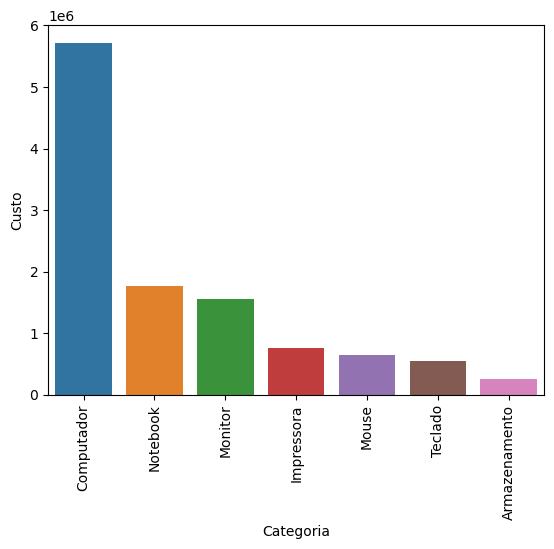

In [51]:
# Seaborn 1
gfg = sns.barplot(x=categoria_custo_total['Categoria'], y=categoria_custo_total['Custo'])
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

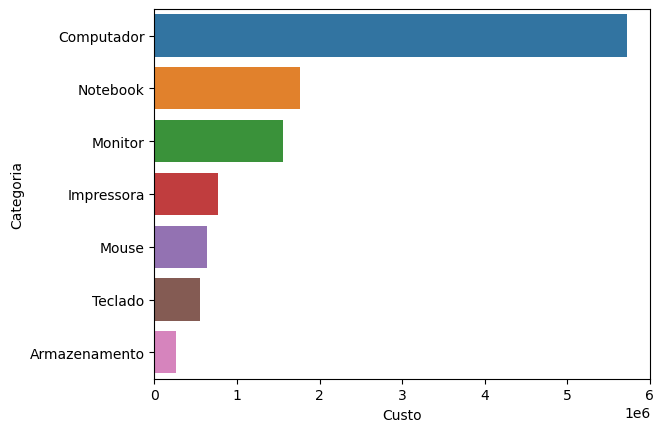

In [52]:
# Seaborn 1
gfg = sns.barplot(x=categoria_custo_total['Custo'], y=categoria_custo_total['Categoria']);

In [53]:
# Plotly Express 1
fig = px.bar(categoria_custo_total, x="Categoria", y="Custo", title='Vendas por Categoria', color='Categoria')
fig.show()

In [54]:
# Plotly Express 2
fig = px.bar(categoria_custo_total, x="Custo", y="Categoria", title='Vendas por Categoria', color='Categoria')
fig.show()

////////////////////////////////////////////

Problemas básicos de como estruturar esta seleção para fazer um bar-charts

In [57]:
categoria_quantidade_custo_unitario_total = df.groupby(['Categoria'], as_index=False)[['Quantidade', 'Custo', 'Valor Unitário']].sum()
categoria_quantidade_custo_unitario_total.sort_values(by='Custo', ascending=False, inplace=True)
categoria_quantidade_custo_unitario_total_max = int(categoria_quantidade_custo_unitario_total['Custo'].max() * 1.01)
categoria_quantidade_custo_unitario_total_min = int(categoria_quantidade_custo_unitario_total['Custo'].min() * 0.95)
display(categoria_quantidade_custo_unitario_total)

,Categoria,Quantidade,Custo,Valor Unitário
1,Computador,3900,5721747.84,9958548.09
5,Notebook,4579,1761308.34,3108356.48
3,Monitor,5568,1556036.09,2686228.61
2,Impressora,3895,765285.25,1337376.05
4,Mouse,4823,638173.42,1101711.48
6,Teclado,3625,548835.96,946831.50
0,Armazenamento,3719,255552.05,444938.73


In [68]:
# Seaborn 1

# Seaborn 2

In [ ]:
# Plotly Express 1

# Plotly Express 2

////////////////////////////////////////////

In [73]:
lucratividade_categoria = pd.DataFrame()
lucratividade_categoria['Categoria'] = df_locratividade_categoria['Categoria']
lucratividade_categoria['Lucro'] = df_locratividade_categoria['Valor Unitário'] - df_locratividade_categoria['Custo']

lucratividade_categoria.sort_values(by='Lucro', ascending=False, inplace=True)

display(lucratividade_categoria)

,Categoria,Lucro
1,Computador,4236800.25
5,Notebook,1347048.14
3,Monitor,1130192.52
2,Impressora,572090.80
4,Mouse,463538.06
6,Teclado,397995.54
0,Armazenamento,189386.68


In [74]:
# Plotly Express 1
fig = px.bar(lucratividade_categoria, x="Categoria", y="Lucro", title='Lucro por Categoria', color='Categoria')
fig.show()

### Fluxo de Entrada e Saída
Monitora o fluxo de produtos, ajudando a entender o movimento do inventário.
* **Relação**: Data x Entrada ou Saida de Produto (Quantidade) (Compra x Venda)
* **Gráfico**: Fluxo de Caixa

### Canais de Venda
Compara a performance de vendas online versus loja física, orientando estratégias de marketing e venda.
* **Relação**: Meio de Venda (Canal de Venda) x Valor Total de Vendas.
* **Pizza** ou Donut.

In [78]:
canal_venda_valor_unitario = df.groupby('Canal de Venda')['Valor Unitário'].sum()
display(canal_venda_valor_unitario)

Canal de Venda
Distribuidor    6402253.07
Loja Física     6495171.71
Online          6686566.16
Name: Valor Unitário, dtype: float64

In [90]:
fig = px.pie(canal_venda_valor_unitario, values=canal_venda_valor_unitario.values, names=canal_venda_valor_unitario.index, title='Relação entre Meio de Cenda e Total de Vendas')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20)
fig.update_layout(margin=dict(t=70, b=20, l=0, r=0), width=600)
fig.show();

### Preferência de Pagamento
Identifica as formas de pagamento preferidas pelos clientes, podendo influenciar as opções oferecidas.
* **Relação**: Forma de Pagamento (Método de Pagamento) x Valor Total
* **Gráfico**: Barras Horizontais

In [91]:
metodo_pagamento_valor_total = df.groupby('Método de Pagamento')['Valor Unitário'].sum()
display(metodo_pagamento_valor_total)

Método de Pagamento
A Vista                   4826564.49
Boleto                    4990136.86
Cartão de Crédito         4897282.28
Transferência Bancária    4870007.31
Name: Valor Unitário, dtype: float64

In [96]:
# Plotly Express 1
fig = px.bar(metodo_pagamento_valor_total, x=metodo_pagamento_valor_total.index, y=metodo_pagamento_valor_total.values, title='Preferência de Pagamento', color=metodo_pagamento_valor_total.index)
fig.show()

In [95]:
# Plotly Express 2
fig = px.bar(metodo_pagamento_valor_total, x=metodo_pagamento_valor_total.values, y=metodo_pagamento_valor_total.index, title='Preferência de Pagamento', color=metodo_pagamento_valor_total.index)
fig.show()

In [94]:
fig = px.pie(metodo_pagamento_valor_total, values=metodo_pagamento_valor_total.values, names=metodo_pagamento_valor_total.index, title='Preferência de Pagamento')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20)
fig.update_layout(margin=dict(t=70, b=20, l=0, r=0), width=600)
fig.show();

### Análise Geográfica
Destaca as áreas geográficas com maior volume de vendas, direcionando esforços de marketing localizados.
* **Relação**: Cidade e Estado x Valor Total de Venda
* **Gráfico**: Mapa de Calor

# Para um outro dia...

### Relacionamento de Dados

In [36]:
# Relacionar Data de Transição com o volume de compra e venda para identificar padrões ao longo do tempo
vol_compra_venda = df.groupby(['Ano', 'Mes','Tipo'], as_index=False)['Quantidade'].sum()
display(vol_compra_venda)

,Ano,Mes,Tipo,Quantidade
0,2010,1,Compra,95
1,2010,1,Venda,85
2,2010,2,Compra,120
3,2010,2,Venda,96
4,2010,3,Compra,78
...,...,...,...,...
331,2023,10,Venda,70
332,2023,11,Compra,71
333,2023,11,Venda,115
334,2023,12,Compra,90


### Análise de Produtos

In [37]:
# Correlacionar o Produto com a quantidade vendida (produtos mais populares)
vol_produto_vendido = df[(df['Tipo'] == 'Venda')].groupby(['Ano', 'Produto'], as_index=False)['Quantidade'].sum()
display(vol_produto_vendido)

,Ano,Produto,Quantidade
0,2010,Computador Apple,48
1,2010,Computador Dell,22
2,2010,Computador HP,56
3,2010,Computador Lenovo,35
4,2010,HD Externo Adata,42
...,...,...,...
443,2023,Notebook Samsung,41
444,2023,Teclado Corsair,41
445,2023,Teclado Logitech,30
446,2023,Teclado Microsoft,37


In [38]:
display(vol_produto_vendido)

,Ano,Produto,Quantidade
0,2010,Computador Apple,48
1,2010,Computador Dell,22
2,2010,Computador HP,56
3,2010,Computador Lenovo,35
4,2010,HD Externo Adata,42
...,...,...,...
443,2023,Notebook Samsung,41
444,2023,Teclado Corsair,41
445,2023,Teclado Logitech,30
446,2023,Teclado Microsoft,37


In [39]:
# Os 3 (três) produtos mais vendidos entre 2010 e 2024
vol_produto_vendido.iloc[vol_produto_vendido['Quantidade'].argsort()[-3:]]

,Ano,Produto,Quantidade
285,2018,Teclado Logitech,62
231,2017,HD Externo Western Digital,63
407,2022,Notebook Acer,63


In [40]:
vol_produto_vendido.groupby(['Ano'], as_index=False)['Quantidade'].sum()

,Ano,Quantidade
0,2010,1095
1,2011,1094
2,2012,1097
3,2013,1033
4,2014,1005
5,2015,1021
6,2016,1121
7,2017,1080
8,2018,1166
9,2019,1086


### Análise de Preço

In [ ]:
# Associar valor unitário do produto com o tipo de transação para entender a dinâmica de preços

## Tática

## Estratégica

# Exportação da Base de Dados

In [97]:
display(df)

,Data,Mes,Ano,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
0,2010-01-01 15:57:36,1,2010,Computador Lenovo,Computador,2,Venda,10208.56,7496.99,Online,A Vista,MT,Nova Mutum
1,2010-01-04 09:35:31,1,2010,Computador Lenovo,Computador,3,Compra,9044.01,4491.92,Loja Física,Cartão de Crédito,GO,Rio Quente
2,2010-01-04 09:43:37,1,2010,Notebook Dell,Notebook,1,Venda,2427.47,1487.71,Loja Física,Transferência Bancária,MS,Juti
3,2010-01-04 10:13:10,1,2010,Impressora Epson,Impressora,1,Venda,839.06,521.64,Loja Física,Boleto,DF,Brasília
4,2010-01-04 12:03:09,1,2010,Impressora Epson,Impressora,4,Venda,776.69,342.24,Distribuidor,Boleto,PB,Várzea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-12-27 13:10:19,12,2023,Notebook Samsung,Notebook,1,Compra,1061.95,459.98,Online,Cartão de Crédito,PI,Alagoinha do Piauí
9996,2023-12-27 14:43:52,12,2023,Notebook Lenovo,Notebook,4,Compra,2390.38,926.48,Distribuidor,Cartão de Crédito,MT,Nova Mutum
9997,2023-12-28 09:00:54,12,2023,HD Externo Western Digital,Armazenamento,4,Venda,564.04,238.81,Loja Física,A Vista,AP,Pracuúba
9998,2023-12-28 09:36:28,12,2023,Teclado Radragon,Teclado,2,Compra,513.55,266.07,Loja Física,Transferência Bancária,SP,Vargem Grande Paulista


In [42]:
df.to_csv(r'base_dados_tratada.csv', index=False, encoding='utf-8')